In [1]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# Genetic recombination

* [Genetic recombination - Wikipedia](https://en.wikipedia.org/wiki/Genetic_recombination)
    * [Homologous recombination - Wikipedia](https://en.wikipedia.org/wiki/Homologous_recombination)
        * [Chromosomal crossover - Wikipedia](https://en.wikipedia.org/wiki/Chromosomal_crossover), 
          - (1909) [Thomas Hunt Morgan - Wikipedia](https://en.wikipedia.org/wiki/Thomas_Hunt_Morgan)
    * Nonhomologous recombination
      - [Chromosomal translocation - Wikipedia](https://en.wikipedia.org/wiki/Chromosomal_translocation)

![fig-3](https://upload.wikimedia.org/wikipedia/commons/0/0e/Morgan_crossover_1.jpg)

* [Genetic engineering - Wikipedia](https://en.wikipedia.org/wiki/Genetic_engineering)
  * [Recombinant DNA - Wikipedia](https://en.wikipedia.org/wiki/Recombinant_DNA)

## PyDNA

* [Pydna: a simulation and documentation tool for DNA assembly strategies using python | BMC Bioinformatics | Full Text](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-015-0544-x)
* [BjornFJohansson/pydna: Clone with Python! Data structures for double stranded DNA & simulation of homologous recombination, Gibson assembly, cut & paste cloning.](https://github.com/BjornFJohansson/pydna)
  - [Welcome to Pydna’s documentation! — Python 4.0.8.dev0+g9b2c2d2.d20220210 documentation](https://pydna.readthedocs.io/)
  - [pydna/cookbook.ipynb at master · BjornFJohansson/pydna](https://github.com/BjornFJohansson/pydna/blob/master/docs/cookbook/cookbook.ipynb)

In [2]:
from Bio import SeqIO
from Bio.Seq import Seq

In [3]:
import re
import difflib

In [4]:
from pydna.genbank import Genbank

## Plasmid \#61766

* [Vector (molecular biology) - Wikipedia](https://en.wikipedia.org/wiki/Vector_%28molecular_biology%29)
* [Plasmid - Wikipedia](https://en.wikipedia.org/wiki/Plasmid)
  - (1952) any extrachromosomal hereditary determinant
    - 染色体外の遺伝性決定因子
      - 染色体外部に排他的または優勢的に存在
      - 自律的に複製可能
    - 主に環状で小規模 (1kbp &ndash; 数mbp)

### GenBankから遺伝子配列をダウンロードする

* [GenBank Overview](https://www.ncbi.nlm.nih.gov/genbank/)
  - [GenBank - Wikipedia](https://en.wikipedia.org/wiki/GenBank)
* KC562906.1
  - [Cloning vector YEp24PGK, complete sequence - Nucleotide - NCBI](https://www.ncbi.nlm.nih.gov/nuccore/KC562906)
  - [YEp24PGK vector map and sequence](https://novoprolabs.com/vector/Vgeytaobz)

In [5]:
from pydna.genbank import Genbank

In [6]:
gb = Genbank("u416528d@ecs.osaka-u.ac.jp")

In [7]:
YEp24PGK = gb.nucleotide("KC562906.1")
print(YEp24PGK)

Dseqrecord
circular: True
size: 9637
ID: KC562906.1
Name: KC562906
Description: Cloning vector YEp24PGK, complete sequence
Number of features: 10
/molecule_type=DNA
/topology=circular
/data_file_division=SYN
/date=12-FEB-2013
/accessions=['KC562906']
/sequence_version=1
/keywords=['']
/source=Cloning vector YEp24PGK
/organism=Cloning vector YEp24PGK
/taxonomy=['other sequences', 'artificial sequences', 'vectors']
/references=[Reference(title='Direct Submission', ...)]
Dseq(o9637)
GAAT..TCAA
CTTA..AGTT


In [8]:
YEp24PGK.seq

Dseq(o9637)
GAAT..TCAA
CTTA..AGTT

In [9]:
len(YEp24PGK.seq)

9637

In [10]:
site="AGATCT"
re.sub(r"("+site+")", site.lower(), str(YEp24PGK.seq))

'GAATTCTGAACCAGTCCTAAAACGAGTAAATAGGACCGGCAATTCTTCAAGCAATAAACAGGAATACCAATTATTAAAAGATAACTTAGTCAGATCGTACAATAAAGCTAGCTTTGAAGAAAAATGCGCCTTATTCAATCTTTGCTATAAAAAATGGCCCAAAATCTCACATTGGAAGACATTTGATGACCTCATTTCTTTCAATGAAGGGCCTAACGGAGTTGACTAATGTTGTGGGAAATTGGAGCGATAAGCGTGCTTCTGCCGTGGCCAGGACAACGTATACTCATCAGATAACAGCAATACCTGATCACTACTTCGCACTAGTTTCTCGGTACTATGCATATGATCCAATATCAAAGGAAATGATAGCATTGAAGGATGAGACTAATCCAATTGAGGAGTGGCAGCATATAGAACAGCTAAAGGGTAGTGCTGAAGGAAGCATACGATACCCCGCATGGAATGGGATAATATCACAGGAGGTACTAGACTACCTTTCATCCTACATAAATAGACGCATATAAGTACGCATTTAAGCATAAACACGCACTATGCCGTTCTTCTCATGTATATATATATACAGGCAACACGCAGATATAGGTGCGACGTGAACAGTGAGCTGTATGTGCGCAGCTCGCGTTGCATTTTCGGAAGCGCTCGTTTTCGGAAACGCTTTGAAGTTCCTATTCCGAAGTTCCTATTCTCTAGAAAGTATAGGAACTTCAGAGCGCTTTTGAAAACCAAAAGCGCTCTGAAGACGCACTTTCAAAAAACCAAAAACGCACCGGACTGTAACGAGCTACTAAAATATTGCGAATACCGCTTCCACAAACATTGCTCAAAAGTATCTCTTTGCTATATATCTCTGTGCTATATCCCTATATAACCTACCCATCCACCTTTCGCTCCTTGAACTTGCATCTAAACTCGACCTCTACATTTTTTATGTTTATCTCTAGTATTACTCTTTAGACAAAAAAATTGTAGTAAGAACTA

### 制限酵素 Bgl II で消化する (ループが切れる)

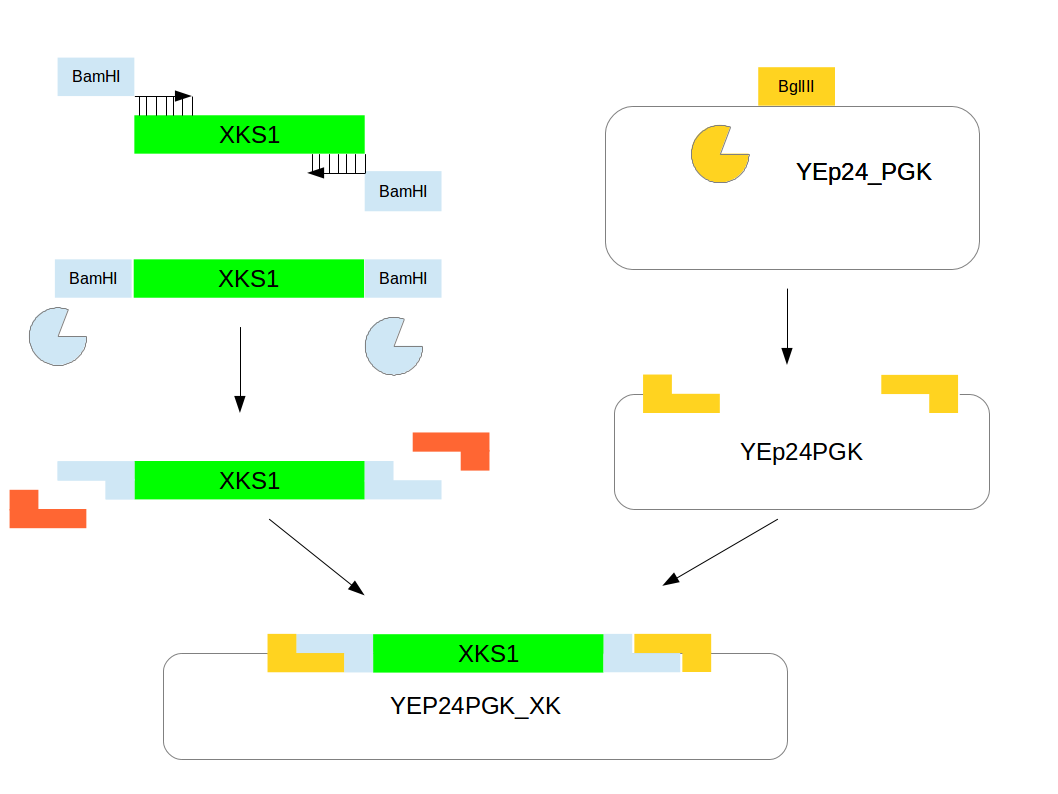

* [Restriction digest - Wikipedia](https://en.wikipedia.org/wiki/Restriction_digest)
  - [BglII - Wikipedia](https://en.wikipedia.org/wiki/BglII)
```
A|GATC T
T CTAG|A
```

In [10]:
from Bio.Restriction import BglII

In [11]:
type(BglII)

RestrictionType

In [12]:
YEp24PGK_BglII = YEp24PGK.linearize(BglII)

In [13]:
print(YEp24PGK_BglII)

Dseqrecord
circular: False
size: 9641
ID: KC562906_lin
Name: KC562906_lin
Description: description
Number of features: 9
/molecule_type=DNA
Dseq(-9641)
GATCTCCC..AAAA    
    AGGG..TTTTCTAG


In [14]:
len(YEp24PGK_BglII.seq)

9641

In [15]:
gatc="GATC"
re.sub(r"("+gatc+")", gatc.lower(), str(YEp24PGK_BglII.seq))

'gatcTCCCATGTCTCTACTGGTGGTGGTGCTTCTTTGGAATTATTGGAAGGTAAGGAATTGCCAGGTGTTGCTTTCTTATCCGAAAAGAAATAAATTGAATTGAATTGAAATCGATAgatcAATTTTTTTCTTTTCTCTTTCCCCATCCTTTACGCTAAAATAATAGTTTATTTTATTTTTTGAATATTTTTTATTTATATACGTATATATAGACTATTATTTATCTTTTAATGATTATTAAGATTTTTATTAAAAAAAAATTCGCTCCTCTTTTAATGCCTTTATGCAGTTTTTTTTTCCCATTCGATATTTCTATGTTCGGGTTCAGCGTATTTTAAGTTTAATAACTCGAAAATTCTGCGTTCGTTAAAGCTTTAATGCGGTAGTTTATCACAGTTAAATTGCTAACGCAGTCAGGCACCGTGTATGAAATCTAACAATGCGCTCATCGTCATCCTCGGCACCGTCACCCTGGATGCTGTAGGCATAGGCTTGGTTATGCCGGTACTGCCGGGCCTCTTGCGGGATATCGTCCATTCCGACAGCATCGCCAGTCACTATGGCGTGCTGCTAGCGCTATATGCGTTGATGCAATTTCTATGCGCACCCGTTCTCGGAGCACTGTCCGACCGCTTTGGCCGCCGCCCAGTCCTGCTCGCTTCGCTACTTGGAGCCACTATCGACTACGCgatcATGGCGACCACACCCGTCCTGTGgatcCTCTACGCCGGACGCATCGTGGCCGGCATCACCGGCGCCACAGGTGCGGTTGCTGGCGCCTATATCGCCGACATCACCGATGGGGAAgatcGGGCTCGCCACTTCGGGCTCATGAGCGCTTGTTTCGGCGTGGGTATGGTGGCAGGCCCCGTGGCCGGGGGACTGTTGGGCGCCATCTCCTTGCATGCACCATTCCTTGCGGCGGCGGTGCTCAACGGCCTCAACCTACTACTGGGCTGCTTCCTAATGCAGGAGTCGCATAAGGGAGAGCGTCGACC

## XKS1

出芽酵母 (S.cerevisiae) 由来の酵素

* [Xylulokinase - Wikipedia](https://en.wikipedia.org/wiki/Xylulokinase)
* [S.cerevisiae chromosome VII reading frame ORF YGR194c - Nucleotide - NCBI](https://www.ncbi.nlm.nih.gov/nuccore/Z72979)

In [11]:
XKS1 = gb.nucleotide("Z72979.1").reverse_complement()
print(XKS1)

Dseqrecord
circular: False
size: 3140
ID: Z72979.1_rc
Name: Z72979_rc
Description: S.cerevisiae chromosome VII reading frame ORF YGR194c_rc
Number of features: 2
/molecule_type=DNA
Dseq(-3140)
ATGA..AAAA
TACT..TTTT


In [12]:
len(XKS1.seq)

3140

In [19]:
site1 = "TGTTCAGTAATTCAG"
site2 = str(Seq("GACCTTTTCTGAGAGTAGATT").complement())
site1, site2

('TGTTCAGTAATTCAG', 'CTGGAAAAGACTCTCATCTAA')

In [20]:
re.sub(r"("+site1+")", site1.lower(),
       re.sub(r"("+site2+")", site2.lower(), str(XKS1.seq)))       

'ATGATGATCCTGCTGTAGTTATGGCACTAAAGTTTTTTTGTAAATCTTTTTATATGTTAATAGATTTTACCAGTGGGACCCTGGAAAGAAAATATGTGTAAATGATGTTTTCTTTTGGATGATGTTCATTGCACAATGGTTCGCAATGTCATTCATTCATCCATTTCTTCTAGCTTTTCAATTATTAATGCCTTAAAATTTTTCAATTTCACCGCGTTACCCGAAGATGTAAATGTACCTACTCAAATAAAAGGTTCCTTGCTGGTTGGCTTTCGTAGCTAAATTGAGTGCACGTTACAAGATTATAAATGCGTTTATATATATATATTCCAGTGAATGATCTACTTTTGCTTAAGCGGCAGAATTGCAAATCTTAATTTTTCTTTTTTGTTTATGTTTTATTTCCTTGTGACAAATAAAATTTTTTTCTCTTCTGAATTTTTAAAACTAAAGAACAAAATATTAAAATAAACAAACAATTCTCCACTTTTTCTTCTTTTGGTATAGAAACTGATAGAAATGTCCTAGACCCTTAATAAGCAAAACACTCATCATTATAACGGGAAAAAATTTGAAGCAAGCTCAAAAGAGATATATATATCATCCAGCATAGACTACTATTAATTTCTATCATAATTGCAATAAAAAAGGAAATATTTAGGGGATCAAGACCATTATTCCATCAGAATGGAAAAAAGTTTAAAAGATCACGGAGATTTTGTTCTTCTGAGCTTCTGCTGTCCTTGAAAACAAATTATTCCGCTGGCCGCCCCAAACAAAAACAACCCCGATTTAATAACATTGTCACAGTATTAGAAATTTTCTTTTTACAAATTACCATTTCCAGCTTACTACTTCCTATAATCCTCAATCTTCAGCAAGCGACGCAGGGAATAGCCGCTGAGGTGCATAACTGTCACTTTTCAATTCGGCCAATGCAATCTCAGGCGGACGAATAAGGGGGCCCTCTCGAGAAAAACAAAAGGAGGATGAGATTAG

## PCRの際にプライマーを混入
* [PCRとは（基本情報）](https://www.roche-diagnostics.jp/ja/general/pcr/pcr_1.html)
* [Polymerase chain reaction - Wikipedia](https://en.wikipedia.org/wiki/Polymerase_chain_reaction)
  - [Primer binding site - Wikipedia](https://en.wikipedia.org/wiki/Primer_binding_site)


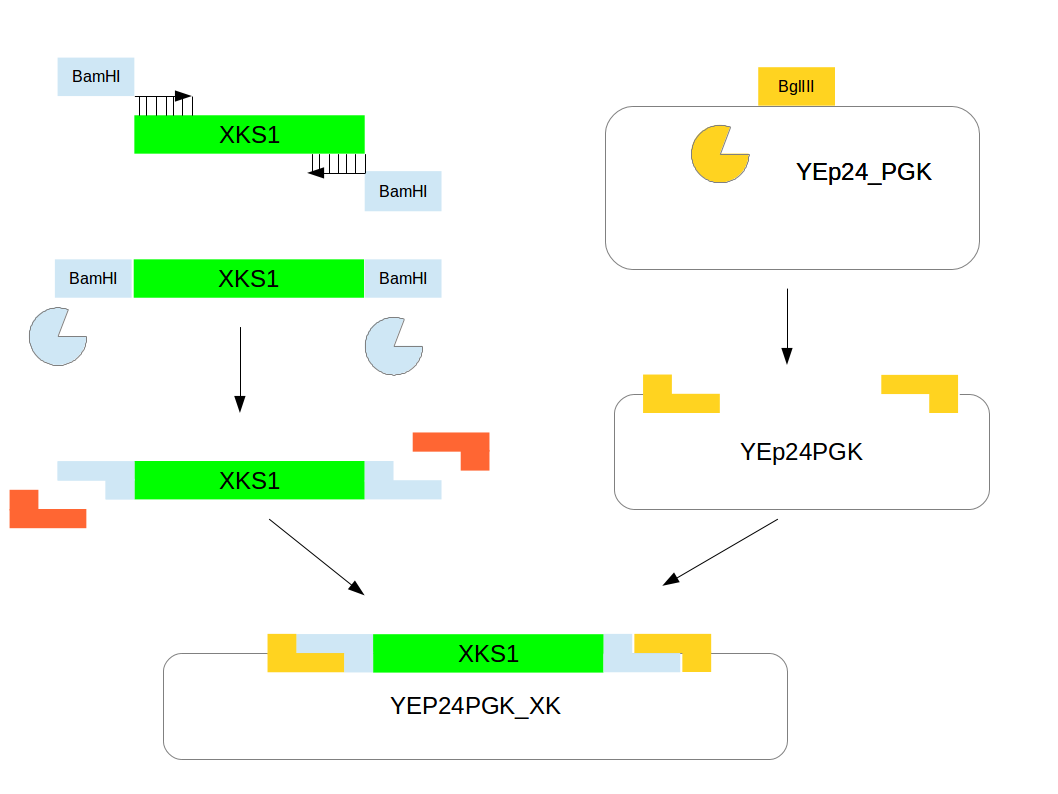

In [21]:
from pydna.parsers import parse_primers

In [22]:
p1, p3 = parse_primers('''
>primer1
GCGGATCCTCTAGAATGGTTTGTTCAGTAATTCAG
>primer3
AGATCTGGATCCTTAGATGAGAGTCTTTTCCAG''')

In [23]:
print(p1)

ID: primer1
Name: primer1
Description: primer1
Number of features: 0
/molecule_type=DNA
Seq('GCGGATCCTCTAGAATGGTTTGTTCAGTAATTCAG')


In [24]:
print(p3)

ID: primer3
Name: primer3
Description: primer3
Number of features: 0
/molecule_type=DNA
Seq('AGATCTGGATCCTTAGATGAGAGTCTTTTCCAG')


In [25]:
site1="TGTTCAGTAATTCAG"
re.sub(r"("+site1+")", site1.lower(), str(p1.seq))

'GCGGATCCTCTAGAATGGTTtgttcagtaattcag'

In [26]:
site3="CTGGAAAAGACTCTCATCTAA"
re.sub(r"("+site3+")", site3.lower(), str(p3.seq.reverse_complement()))

'ctggaaaagactctcatctaaGGATCCAGATCT'

In [27]:
from pydna.amplify import pcr

In [28]:
PCR_prod = pcr(p1, p3, XKS1)

In [29]:
PCR_prod.figure()

                    5TGTTCAGTAATTCAG...CTGGAAAAGACTCTCATCTAA3
                                       |||||||||||||||||||||
                                      3GACCTTTTCTGAGAGTAGATTCCTAGGTCTAGA5
5GCGGATCCTCTAGAATGGTTTGTTCAGTAATTCAG3
                     |||||||||||||||
                    3ACAAGTCATTAAGTC...GACCTTTTCTGAGAGTAGATT5

In [30]:
print(PCR_prod)

Dseqrecord
circular: False
size: 1829
ID: 1829bp_eXS4gUL3YKo0RatU7RgpYCim-qw
Name: 1829bp_PCR_prod
Description: pcr_product_primer1_primer3
Number of features: 2
/molecule_type=DNA
Dseq(-1829)
GCGG..ATCT
CGCC..TAGA


In [31]:
site1="TGTTCAGTAATTCAG"
site3="CTGGAAAAGACTCTCATCTAA"
re.sub(r"("+site1+")", site1.lower(), 
       re.sub(r"("+site3+")", site3.lower(), str(PCR_prod.seq)))

'GCGGATCCTCTAGAATGGTTtgttcagtaattcagAGACAGACAAGAGAGGTTTCCAACACAATGTCTTTAGACTCATACTATCTTGGGTTTGATCTTTCGACCCAACAACTGAAATGTCTCGCCATTAACCAGGACCTAAAAATTGTCCATTCAGAAACAGTGGAATTTGAAAAGGATCTTCCGCATTATCACACAAAGAAGGGTGTCTATATACACGGCGACACTATCGAATGTCCCGTAGCCATGTGGTTAGAGGCTCTAGATCTGGTTCTCTCGAAATATCGCGAGGCTAAATTTCCATTGAACAAAGTTATGGCCGTCTCAGGGTCCTGCCAGCAGCACGGGTCTGTCTACTGGTCCTCCCAAGCCGAATCTCTGTTAGAGCAATTGAATAAGAAACCGGAAAAAGATTTATTGCACTACGTGAGCTCTGTAGCATTTGCAAGGCAAACCGCCCCCAATTGGCAAGACCACAGTACTGCAAAGCAATGTCAAGAGTTTGAAGAGTGCATAGGTGGGCCTGAAAAAATGGCTCAATTAACAGGGTCCAGAGCCCATTTTAGATTTACTGGTCCTCAAATTCTGAAAATTGCACAATTAGAACCAGAAGCTTACGAAAAAACAAAGACCATTTCTTTAGTGTCTAATTTTTTGACTTCTATCTTAGTGGGCCATCTTGTTGAATTAGAGGAGGCAGATGCCTGTGGTATGAACCTTTATGATATACGTGAAAGAAAATTCAGTGATGAGCTACTACATCTAATTGATAGTTCTTCTAAGGATAAAACTATCAGACAAAAATTAATGAGAGCACCCATGAAAAATTTGATAGCGGGTACCATCTGTAAATATTTTATTGAGAAGTACGGTTTCAATACAAACTGCAAGGTCTCTCCCATGACTGGGGATAATTTAGCCACTATATGTTCTTTACCCCTGCGGAAGAATGACGTTCTCGTTTCCCTAGGAACAAGTACTACAGTTCTTCTGGTCACCG

### さらに制限酵素で両端を`GATC`に揃える

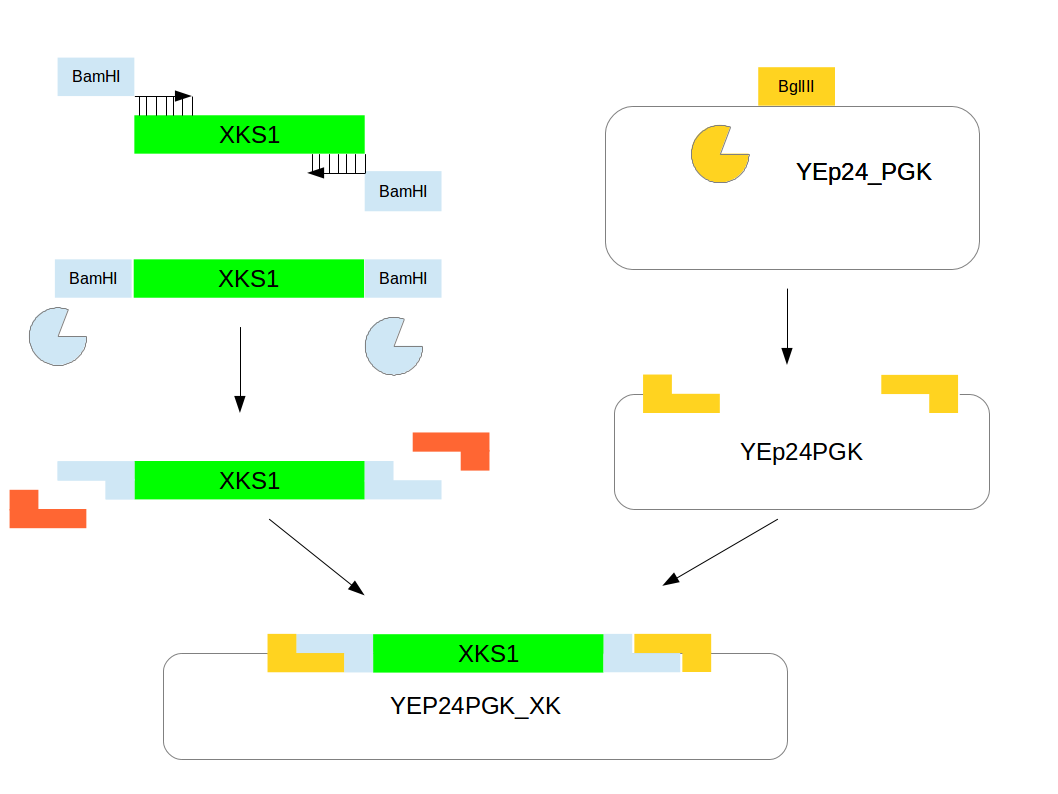

* [Restriction digest - Wikipedia](https://en.wikipedia.org/wiki/Restriction_digest)
  - [BamHI - Wikipedia](https://en.wikipedia.org/wiki/BamHI)
```
G|GATC C
C CTAG|G
```

In [32]:
bamhi="GGATCC"
re.sub(r"("+bamhi+")", bamhi.lower(), str(p1.seq))

'GCggatccTCTAGAATGGTTTGTTCAGTAATTCAG'

In [33]:
bamhi="CCTAGG"
re.sub(r"("+bamhi+")", bamhi.lower(), str(p3.seq)[::-1])

'GACCTTTTCTGAGAGTAGATTcctaggTCTAGA'

In [34]:
from Bio.Restriction import BamHI

In [35]:
stuffer1, insert, stuffer2 = PCR_prod.cut(BamHI)

In [36]:
print(stuffer1)

Dseqrecord
circular: False
size: 7
ID: id
Name: name
Description: description
Number of features: 0
/molecule_type=DNA
Dseq(-7)
GCG
CGCCTAG


In [44]:
print(stuffer2)

Dseqrecord
circular: False
size: 11
ID: id
Name: name
Description: description
Number of features: 0
/molecule_type=DNA
Dseq(-11)
GATCCAGATCT
    GTCTAGA


In [45]:
print(insert)

Dseqrecord
circular: False
size: 1819
ID: id
Name: name
Description: description
Number of features: 2
/molecule_type=DNA
Dseq(-1819)
GATCCTCT..TAAG    
    GAGA..ATTCCTAG


In [46]:
insert.seq

Dseq(-1819)
GATCCTCT..TAAG    
    GAGA..ATTCCTAG

In [274]:
len(insert.seq)

1819

In [276]:
site1="TGTTCAGTAATTCAG"
site3="CTGGAAAAGACTCTCATCTAA"
re.sub(r"("+site1+")", site1.lower(), 
       re.sub(r"("+site3+")", site3.lower(), str(insert.seq)))

'GATCCTCTAGAATGGTTtgttcagtaattcagAGACAGACAAGAGAGGTTTCCAACACAATGTCTTTAGACTCATACTATCTTGGGTTTGATCTTTCGACCCAACAACTGAAATGTCTCGCCATTAACCAGGACCTAAAAATTGTCCATTCAGAAACAGTGGAATTTGAAAAGGATCTTCCGCATTATCACACAAAGAAGGGTGTCTATATACACGGCGACACTATCGAATGTCCCGTAGCCATGTGGTTAGAGGCTCTAGATCTGGTTCTCTCGAAATATCGCGAGGCTAAATTTCCATTGAACAAAGTTATGGCCGTCTCAGGGTCCTGCCAGCAGCACGGGTCTGTCTACTGGTCCTCCCAAGCCGAATCTCTGTTAGAGCAATTGAATAAGAAACCGGAAAAAGATTTATTGCACTACGTGAGCTCTGTAGCATTTGCAAGGCAAACCGCCCCCAATTGGCAAGACCACAGTACTGCAAAGCAATGTCAAGAGTTTGAAGAGTGCATAGGTGGGCCTGAAAAAATGGCTCAATTAACAGGGTCCAGAGCCCATTTTAGATTTACTGGTCCTCAAATTCTGAAAATTGCACAATTAGAACCAGAAGCTTACGAAAAAACAAAGACCATTTCTTTAGTGTCTAATTTTTTGACTTCTATCTTAGTGGGCCATCTTGTTGAATTAGAGGAGGCAGATGCCTGTGGTATGAACCTTTATGATATACGTGAAAGAAAATTCAGTGATGAGCTACTACATCTAATTGATAGTTCTTCTAAGGATAAAACTATCAGACAAAAATTAATGAGAGCACCCATGAAAAATTTGATAGCGGGTACCATCTGTAAATATTTTATTGAGAAGTACGGTTTCAATACAAACTGCAAGGTCTCTCCCATGACTGGGGATAATTTAGCCACTATATGTTCTTTACCCCTGCGGAAGAATGACGTTCTCGTTTCCCTAGGAACAAGTACTACAGTTCTTCTGGTCACCGATA

## ループを切り離した YEp24PGK に XKS1 を挿入してループにする

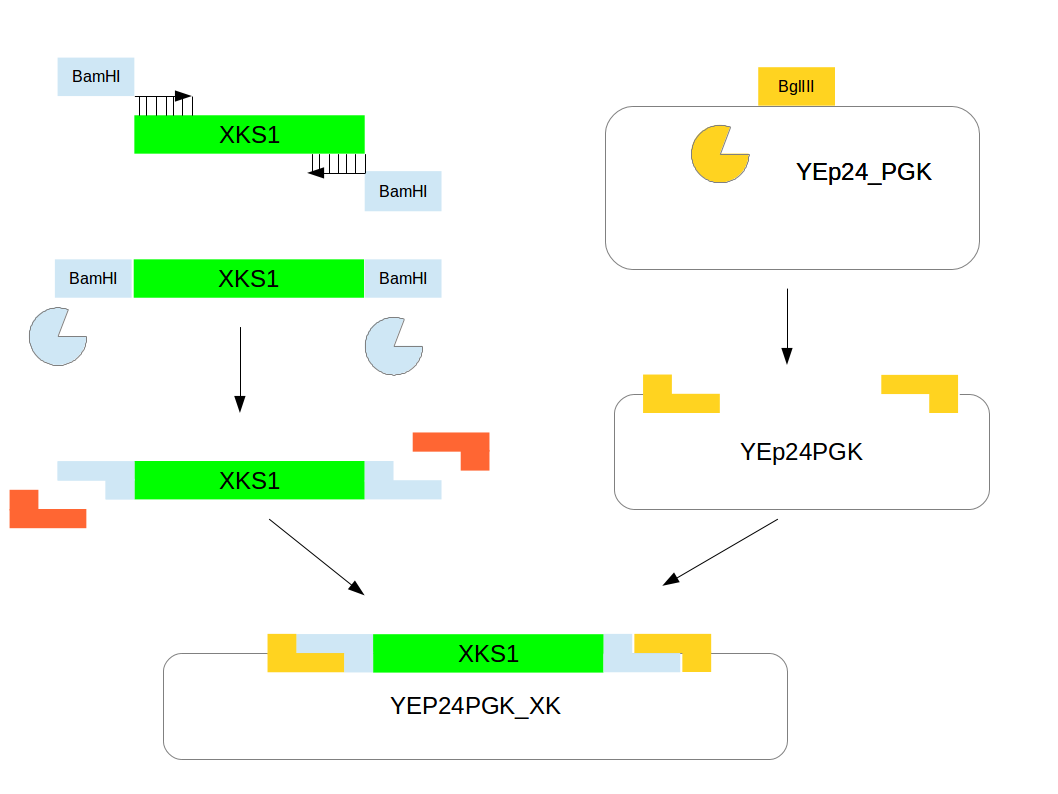

In [303]:
str(YEp24PGK_BglII.seq)[-4:], str(insert.seq)[:4]

('GATC', 'GATC')

In [304]:
str(YEp24PGK_BglII.seq)[:4], str(insert.seq)[-4:]

('GATC', 'GATC')

In [54]:
YEp24PGK_XK = (YEp24PGK_BglII + insert).looped()

### シーケンス開始点を揃える

In [55]:
YEp24PGK_XK = YEp24PGK_XK.synced(YEp24PGK)

In [63]:
print(YEp24PGK_XK)

Dseqrecord
circular: True
size: 11452
ID: id
Name: name
Description: description
Number of features: 11
/molecule_type=DNA
Dseq(o11452)
GAAT..TCAA
CTTA..AGTT


In [57]:
len(YEp24PGK_XK.seq)

11452

In [56]:
str(YEp24PGK_XK.seq)

'GAATTCTGAACCAGTCCTAAAACGAGTAAATAGGACCGGCAATTCTTCAAGCAATAAACAGGAATACCAATTATTAAAAGATAACTTAGTCAGATCGTACAATAAAGCTAGCTTTGAAGAAAAATGCGCCTTATTCAATCTTTGCTATAAAAAATGGCCCAAAATCTCACATTGGAAGACATTTGATGACCTCATTTCTTTCAATGAAGGGCCTAACGGAGTTGACTAATGTTGTGGGAAATTGGAGCGATAAGCGTGCTTCTGCCGTGGCCAGGACAACGTATACTCATCAGATAACAGCAATACCTGATCACTACTTCGCACTAGTTTCTCGGTACTATGCATATGATCCAATATCAAAGGAAATGATAGCATTGAAGGATGAGACTAATCCAATTGAGGAGTGGCAGCATATAGAACAGCTAAAGGGTAGTGCTGAAGGAAGCATACGATACCCCGCATGGAATGGGATAATATCACAGGAGGTACTAGACTACCTTTCATCCTACATAAATAGACGCATATAAGTACGCATTTAAGCATAAACACGCACTATGCCGTTCTTCTCATGTATATATATATACAGGCAACACGCAGATATAGGTGCGACGTGAACAGTGAGCTGTATGTGCGCAGCTCGCGTTGCATTTTCGGAAGCGCTCGTTTTCGGAAACGCTTTGAAGTTCCTATTCCGAAGTTCCTATTCTCTAGAAAGTATAGGAACTTCAGAGCGCTTTTGAAAACCAAAAGCGCTCTGAAGACGCACTTTCAAAAAACCAAAAACGCACCGGACTGTAACGAGCTACTAAAATATTGCGAATACCGCTTCCACAAACATTGCTCAAAAGTATCTCTTTGCTATATATCTCTGTGCTATATCCCTATATAACCTACCCATCCACCTTTCGCTCCTTGAACTTGCATCTAAACTCGACCTCTACATTTTTTATGTTTATCTCTAGTATTACTCTTTAGACAAAAAAATTGTAGTAAGAACTA

## 以下補足

In [64]:
import difflib

In [123]:
g=difflib.ndiff(str(YEp24PGK.seq), str(YEp24PGK_XK.seq))

In [124]:
i=0
for x in g:
    if x[0] != ' ':
        print("{: 4d} {:s}".format(i, x))
        break
    i+=1

 4939 - T


In [131]:
g=difflib.ndiff(str(YEp24PGK.seq)[::-1], str(YEp24PGK_XK.seq)[::-1])

In [132]:
i=1
for x in g:
    if x[0] != ' ':
        print("{: 4d} {:s}".format(i, x))
        break
    i+=1

 4703 - A


In [127]:
str(YEp24PGK.seq)[4939], str(YEp24PGK.seq)[len((YEp24PGK.seq))-4703]

('T', 'A')

In [129]:
str(YEp24PGK_XK.seq)[4939], str(YEp24PGK_XK.seq)[len((YEp24PGK_XK.seq))-4703]

('C', 'G')

In [106]:
len(str(YEp24PGK.seq))

9637

In [134]:
4939+4703

9642

In [141]:
str(YEp24PGK.seq)[4939-4:len(str(YEp24PGK.seq))-4703+5]

'GATC'

In [140]:
str(YEp24PGK_XK.seq)[4939-4:len(YEp24PGK_XK.seq)-4703+5]

'GATCCTCTAGAATGGTTTGTTCAGTAATTCAGAGACAGACAAGAGAGGTTTCCAACACAATGTCTTTAGACTCATACTATCTTGGGTTTGATCTTTCGACCCAACAACTGAAATGTCTCGCCATTAACCAGGACCTAAAAATTGTCCATTCAGAAACAGTGGAATTTGAAAAGGATCTTCCGCATTATCACACAAAGAAGGGTGTCTATATACACGGCGACACTATCGAATGTCCCGTAGCCATGTGGTTAGAGGCTCTAGATCTGGTTCTCTCGAAATATCGCGAGGCTAAATTTCCATTGAACAAAGTTATGGCCGTCTCAGGGTCCTGCCAGCAGCACGGGTCTGTCTACTGGTCCTCCCAAGCCGAATCTCTGTTAGAGCAATTGAATAAGAAACCGGAAAAAGATTTATTGCACTACGTGAGCTCTGTAGCATTTGCAAGGCAAACCGCCCCCAATTGGCAAGACCACAGTACTGCAAAGCAATGTCAAGAGTTTGAAGAGTGCATAGGTGGGCCTGAAAAAATGGCTCAATTAACAGGGTCCAGAGCCCATTTTAGATTTACTGGTCCTCAAATTCTGAAAATTGCACAATTAGAACCAGAAGCTTACGAAAAAACAAAGACCATTTCTTTAGTGTCTAATTTTTTGACTTCTATCTTAGTGGGCCATCTTGTTGAATTAGAGGAGGCAGATGCCTGTGGTATGAACCTTTATGATATACGTGAAAGAAAATTCAGTGATGAGCTACTACATCTAATTGATAGTTCTTCTAAGGATAAAACTATCAGACAAAAATTAATGAGAGCACCCATGAAAAATTTGATAGCGGGTACCATCTGTAAATATTTTATTGAGAAGTACGGTTTCAATACAAACTGCAAGGTCTCTCCCATGACTGGGGATAATTTAGCCACTATATGTTCTTTACCCCTGCGGAAGAATGACGTTCTCGTTTCCCTAGGAACAAGTACTACAGTTCTTCTGGTCACCGATA

In [147]:
str(YEp24PGK_XK.seq.complement())[4939-4:len(YEp24PGK_XK.seq)-4703+5]

'CTAGGAGATCTTACCAAACAAGTCATTAAGTCTCTGTCTGTTCTCTCCAAAGGTTGTGTTACAGAAATCTGAGTATGATAGAACCCAAACTAGAAAGCTGGGTTGTTGACTTTACAGAGCGGTAATTGGTCCTGGATTTTTAACAGGTAAGTCTTTGTCACCTTAAACTTTTCCTAGAAGGCGTAATAGTGTGTTTCTTCCCACAGATATATGTGCCGCTGTGATAGCTTACAGGGCATCGGTACACCAATCTCCGAGATCTAGACCAAGAGAGCTTTATAGCGCTCCGATTTAAAGGTAACTTGTTTCAATACCGGCAGAGTCCCAGGACGGTCGTCGTGCCCAGACAGATGACCAGGAGGGTTCGGCTTAGAGACAATCTCGTTAACTTATTCTTTGGCCTTTTTCTAAATAACGTGATGCACTCGAGACATCGTAAACGTTCCGTTTGGCGGGGGTTAACCGTTCTGGTGTCATGACGTTTCGTTACAGTTCTCAAACTTCTCACGTATCCACCCGGACTTTTTTACCGAGTTAATTGTCCCAGGTCTCGGGTAAAATCTAAATGACCAGGAGTTTAAGACTTTTAACGTGTTAATCTTGGTCTTCGAATGCTTTTTTGTTTCTGGTAAAGAAATCACAGATTAAAAAACTGAAGATAGAATCACCCGGTAGAACAACTTAATCTCCTCCGTCTACGGACACCATACTTGGAAATACTATATGCACTTTCTTTTAAGTCACTACTCGATGATGTAGATTAACTATCAAGAAGATTCCTATTTTGATAGTCTGTTTTTAATTACTCTCGTGGGTACTTTTTAAACTATCGCCCATGGTAGACATTTATAAAATAACTCTTCATGCCAAAGTTATGTTTGACGTTCCAGAGAGGGTACTGACCCCTATTAAATCGGTGATATACAAGAAATGGGGACGCCTTCTTACTGCAAGAGCAAAGGGATCCTTGTTCATGATGTCAAGAAGACCAGTGGCTAT

In [139]:
len(str(YEp24PGK_XK.seq)[4939-4:len(YEp24PGK_XK.seq)-4703+5])

1819